In [ ]:
from foundational_ssm.data_utils.dataset import TorchBrainDataset
from torch.utils.data import DataLoader
from foundational_ssm.constants import DATA_ROOT
from omegaconf import OmegaConf
from foundational_ssm.data_utils.dataset import TorchBrainDataset
from foundational_ssm.data_utils.loaders import transform_brainsets_regular_time_series_smoothed
import numpy as np
from tqdm import tqdm
import h5py
from temporaldata import Data
from foundational_ssm.data_utils.spikes import smooth_spikes
from temporaldata import RegularTimeSeries, Interval
import os

config_path = "/cs/student/projects1/ml/2024/mlaimon/foundational_ssm/configs/dataset/all_brainsets.yaml"
# cfg = OmegaConf.load(config_path) 

all_dataset = TorchBrainDataset(
        root="../"+DATA_ROOT,                # root directory where .h5 files are found
        config=config_path,                 # or a config for multi-session training / more complex configs
        keep_files_open=False,
        lazy=True,
    )

sampling_rate = 200
bin_size_ms = 1000/sampling_rate

recording_ids = all_dataset.get_session_ids()
all_dataset._close_open_files()
for recording_id in tqdm(recording_ids):
    input_path = f"../{DATA_ROOT}/{recording_id}.h5"
    output_path = f"../{DATA_ROOT}/v2/{recording_id}.h5"
    
    with h5py.File(input_path) as f:
        recording_data = Data.from_hdf5(f, lazy=True)
        if "smoothed_binned_spikes" in recording_data.keys():
            print("smoothed_binned_spikes in recording_data.keys()")
    
    with h5py.File(input_path) as f:
        recording_data = Data.from_hdf5(f, lazy=False)
        regular_hand, regular_hand_times = recording_data.cursor.get_regular_time_series_array(sampling_rate, "vel")
        vel_regular = RegularTimeSeries(
            data=regular_hand,
            sampling_rate=sampling_rate,
            domain=Interval(start=min(regular_hand_times), end=max(regular_hand_times)),
        )
        
        binned_spikes, binned_spike_times = recording_data.spikes.get_regular_time_series_array(sampling_rate, "unit_index", is_index=True)
        smoothed_spikes = smooth_spikes(binned_spikes, kern_sd_ms=20, bin_size_ms=5, time_axis=0)
        
        smoothed_binned_spikes = RegularTimeSeries(
            data=smoothed_spikes,
            sampling_rate=sampling_rate,
            domain=Interval(start=min(binned_spike_times), end=max(binned_spike_times)),
        )
        recording_data.vel_regular = vel_regular
        recording_data.smoothed_binned_spikes = smoothed_binned_spikes
    
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with h5py.File(output_path, "w") as f:
        recording_data.to_hdf5(f)

  6%|▋         | 11/175 [30:49<7:39:33, 168.13s/it]


AttributeError: 'Data' object has no attribute 'cursor'

In [24]:
with h5py.File(f"../{DATA_ROOT}/{recording_ids[0]}.h5") as f:
    recording_data = Data.from_hdf5(f, lazy=True)
    if "smoothed_binned_spikes" in recording_data.keys():
        print("smoothed_binned_spikes in recording_data.keys()")
    

smoothed_binned_spikes in recording_data.keys()


In [14]:
import os
output_path = f"../{DATA_ROOT}/v2/{recording_id}.h5"

# 1. Ensure the parent directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)
with h5py.File(output_path, "w") as f:
    recording_data.to_hdf5(f)

In [8]:
import h5py
len(h5py.h5f.get_obj_ids())

13957

In [3]:
with h5py.File(f"../{DATA_ROOT}/{recording_id}.h5") as f:
    recording_data.to_hdf5(f)

ValueError: Unable to synchronously create group (name already exists)

In [19]:
import h5py
from temporaldata import Data

with h5py.File(f"../{DATA_ROOT}/{recording_id}_regular.h5", "r") as f:
    recording_data = Data.from_hdf5(f, lazy=False)
    print(recording_data.keys())
    print(recording_data.cursor.keys())
    print(recording_data.spikes.keys())
    print(recording_data.vel_regular.keys())
    print(recording_data.smoothed_binned_spikes.keys())

['brainset', 'cursor', 'cursor_outlier_segments', 'device', 'eye', 'hand', 'movement_phases', 'session', 'smoothed_binned_spikes', 'spikes', 'subject', 'test_domain', 'train_domain', 'trials', 'units', 'valid_domain', 'vel_regular']
['timestamps', 'acc', 'pos', 'test_mask', 'train_mask', 'valid_mask', 'vel']
['timestamps', 'test_mask', 'train_mask', 'unit_index', 'valid_mask']
['data']
['data']


In [2]:
print(h5py.h5f.get_obj_ids())    # List of open HDF5 object IDs

[<h5py.h5t.TypeFloatID object at 0x7f8b24cd7330>, <h5py.h5t.TypeFloatID object at 0x7f8b246b4db0>, <h5py.h5t.TypeFloatID object at 0x7f8b246b4e50>, <h5py.h5t.TypeFloatID object at 0x7f8b246b4ef0>, <h5py.h5t.TypeOpaqueID object at 0x7f8b246b4f90>, <h5py.h5t.TypeOpaqueID object at 0x7f8b246b5030>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b50d0>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b5170>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b5210>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b52b0>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b5350>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b53f0>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b5490>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b5530>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b55d0>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b5670>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b5710>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b57b0>, <h5py.h5t.TypeIntegerID object at 0x7f8b246b5850>, <h5py.h5t.TypeIntegerID object at 0x7f8b

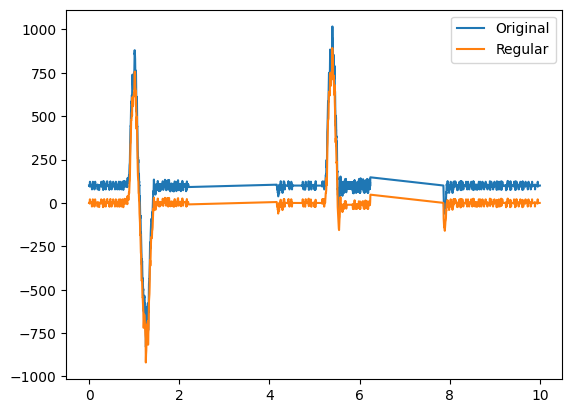

In [20]:
import matplotlib.pyplot as plt
start = 7000
duration = 10   
sliced_recording_data = recording_data.slice(start, start+duration)
plt.plot(sliced_recording_data.cursor.timestamps, sliced_recording_data.cursor.vel[:, 0] + 100, label="Original")
plt.plot(np.arange(0, duration, 1/sampling_rate), sliced_recording_data.vel_regular.data[:, 0] , label="Regular")
plt.legend()
plt.show()

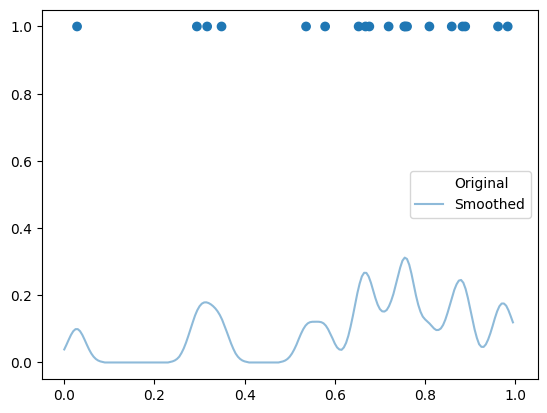

In [32]:
import matplotlib.pyplot as plt
start = 951
duration = 1   
# Test that the regular spikes is the same as the original spikes
unit_to_plot = 0
sliced_recording_data = recording_data.slice(start, start+duration)

irregular_spikes = sliced_recording_data.spikes.unit_index == unit_to_plot
plt.scatter(sliced_recording_data.spikes.timestamps, irregular_spikes, label="Original", alpha=irregular_spikes)
# plt.scatter(binned_spike_times, binned_spikes[:,unit_to_plot], label="Binned", alpha=0.5)
plt.plot(np.arange(0, duration, 1/sampling_rate), sliced_recording_data.smoothed_binned_spikes.data[:,unit_to_plot], label="Smoothed", alpha=0.5)
plt.legend()
plt.show()

In [ ]:
    binned_spikes, _ = data.spikes.get_regular_time_series_array(
        sampling_rate=sampling_rate,
        raw_array_name="unit_index",
        is_index=True,
    )  # shape: (timesteps, units)

    smoothed_spikes = smooth_spikes(
        binned_spikes,
        kern_sd_ms=kern_sd_ms,
        bin_size_ms=bin_size_ms,
        time_axis=0,
    )

    # ------------------------------------------------------------------
    # 2. Prepare behaviour signal (cursor velocity)
    # ------------------------------------------------------------------
    if data.session.id.startswith("pei_pandarinath_nlb_2021"):
        behavior_input, _ = data.hand.get_regular_time_series_array(
            sampling_rate=sampling_rate,
            raw_array_name="vel",
        )  # np.ndarray, (timesteps, features)
    else:
        behavior_input, _ = data.cursor.get_regular_time_series_array(
            sampling_rate=sampling_rate,
            raw_array_name="vel",
        )  # np.ndarray, (timesteps, features)